LR: 0.878889 (0.078008)
LDA: 0.803333 (0.144705)
KNN: 0.847778 (0.108417)
CART: 0.944444 (0.102439)
NB: 0.901111 (0.092222)
SVM: 0.890000 (0.099437)


C:\Users\NEYHO\AppData\Local\Temp\ipykernel_21548\3214668458.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


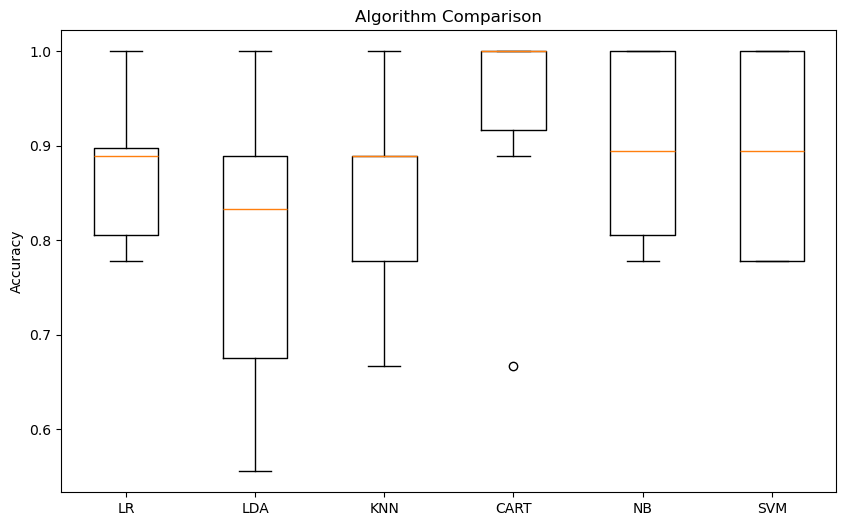

The model with the best accuracy is: CART with an accuracy of 0.94
Predicted Women's Empowerment Group for new data: High


c:\Users\NEYHO\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading the Women Empowerment Index Dataset
url = "https://raw.githubusercontent.com/iamneyho/Assignment-1/refs/heads/main/women_empowerment_index.csv"
data = pd.read_csv(url)

# Encode categorical target column (assuming 'Women's Empowerment Group - 2022' as target)
label_encoder = LabelEncoder()
data["Women's Empowerment Group - 2022"] = label_encoder.fit_transform(data["Women's Empowerment Group - 2022"])
# Splitting the Dataset into Features and Target
X = data[["Women's Empowerment Index (WEI) - 2022", "Global Gender Parity Index (GGPI) - 2022"]]
y = data["Women's Empowerment Group - 2022"]

# Splitting the Dataset into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model Definition: Adding Different ML Models for Evaluation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Cross-Validation: Performing K-Fold Cross-Validation for Each Model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})")

# Visualization: Comparing Model Performances Using a Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

# Conclusion: Finding the model with the best result
best_index = np.argmax([model.mean() for model in results])
best_model_name = names[best_index]
print(f"The model with the best accuracy is: {best_model_name} with an accuracy of {results[best_index].mean():.2f}")

# New Data for Prediction
# Example: [Women's Empowerment Index, Global Gender Parity Index]
new_data = np.array([[0.805, 0.87]])  # Replace with actual values
new_data = scaler.transform(new_data)  # Standardizing new data
best_model = models[best_index][1]  # Getting the best model
best_model.fit(X_train, y_train)  # Fitting the best model to the training data
prediction = best_model.predict(new_data)  # Making the prediction
print(f"Predicted Women's Empowerment Group for new data: {label_encoder.inverse_transform(prediction)[0]}")
